In [1]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 584.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=465a2a7e060c7222c8cd7c380d9a26b3c7952dae012987c03ee6e05887e065e6
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, KFold
from ISLP import load_data

In [3]:
df = load_data('Hitters')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [5]:
df.dropna(inplace = True)

In [6]:
category = list(df.loc[:, df.nunique() < 5])
dummies = pd.get_dummies(data = df[category], drop_first=True).astype(int)
dummies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   League_N     263 non-null    int64
 1   Division_W   263 non-null    int64
 2   NewLeague_N  263 non-null    int64
dtypes: int64(3)
memory usage: 8.2 KB


In [7]:
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
X = pd.concat([X, dummies], axis = 1)
y = df['Salary']
X.info()



<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   AtBat        263 non-null    int64
 1   Hits         263 non-null    int64
 2   HmRun        263 non-null    int64
 3   Runs         263 non-null    int64
 4   RBI          263 non-null    int64
 5   Walks        263 non-null    int64
 6   Years        263 non-null    int64
 7   CAtBat       263 non-null    int64
 8   CHits        263 non-null    int64
 9   CHmRun       263 non-null    int64
 10  CRuns        263 non-null    int64
 11  CRBI         263 non-null    int64
 12  CWalks       263 non-null    int64
 13  PutOuts      263 non-null    int64
 14  Assists      263 non-null    int64
 15  Errors       263 non-null    int64
 16  League_N     263 non-null    int64
 17  Division_W   263 non-null    int64
 18  NewLeague_N  263 non-null    int64
dtypes: int64(19)
memory usage: 41.1 KB


In [8]:
std = StandardScaler()
X_scaled = std.fit_transform(X)
print(X_scaled)

[[-0.6029005  -0.59567545 -0.5285512  ...  1.05875764  0.98116592
   1.07505242]
 [ 0.51254171  0.49225957  0.72996619 ... -0.94450322  0.98116592
  -0.9301872 ]
 [ 0.62816682  0.73648988  0.95878753 ...  1.05875764 -1.01919561
   1.07505242]
 ...
 [ 0.48533581  0.40344855 -0.98619389 ... -0.94450322  0.98116592
  -0.9301872 ]
 [ 1.15188054  0.80309815 -0.29972986 ... -0.94450322 -1.01919561
  -0.9301872 ]
 [ 1.54636621  1.38036979 -0.29972986 ... -0.94450322  0.98116592
  -0.9301872 ]]


In [22]:
lambdas = 10 ** np.linspace(8, -2, 100)/ y.std()
coefs = []
lambdas_try = []

for alpha in lambdas:
    ridge = Ridge(alpha = alpha, fit_intercept=False)
    ridge.fit(X_scaled, y)
    coefs.append(ridge.coef_)
    lambdas_try.append(alpha)


coefs = pd.DataFrame(coefs, columns = X.columns)
alphas = -np.log(lambdas_try)
coefs['log_lambdas'] = alphas

In [23]:
coefs = coefs.set_index(coefs['log_lambdas'])
coefs.drop('log_lambdas', axis = 1, inplace = True)
coefs

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
log_lambdas,,,,,,,,,,,,,,,,,,,
-12.308950,0.209125,0.232597,0.181544,0.222532,0.238096,0.235324,0.211955,0.278565,0.290721,0.277988,0.298014,0.300288,0.259268,0.159736,0.013513,-0.002923,-0.007268,-0.102529,-0.001262
-12.076366,0.263308,0.292934,0.228525,0.280228,0.299787,0.296360,0.266777,0.350692,0.366028,0.349986,0.375210,0.378074,0.326375,0.201308,0.017027,-0.003702,-0.009054,-0.129274,-0.001510
-11.843782,0.331343,0.368735,0.287484,0.352695,0.377248,0.373034,0.335558,0.441228,0.460575,0.440373,0.472129,0.475735,0.410596,0.253616,0.021446,-0.004691,-0.011238,-0.162963,-0.001776
-11.611197,0.416659,0.463859,0.361366,0.443608,0.474388,0.469246,0.421724,0.554719,0.579123,0.553694,0.593651,0.598189,0.516148,0.319384,0.026999,-0.005952,-0.013887,-0.205377,-0.002035
-11.378613,0.523477,0.583061,0.453786,0.557488,0.596009,0.589798,0.529467,0.696741,0.727523,0.695534,0.745774,0.751479,0.648202,0.402000,0.033971,-0.007561,-0.017058,-0.258748,-0.002245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.786563,-291.093559,337.827062,37.851800,-60.569322,-26.993111,135.073069,-16.695382,-391.025998,86.698611,-14.174393,480.729210,260.676744,-213.889330,78.761297,53.732065,-22.161044,31.248798,-58.414232,-12.349019
10.019148,-291.093765,337.827771,37.852222,-60.569977,-26.993499,135.073241,-16.694962,-391.028624,86.696330,-14.175914,480.732929,260.679471,-213.889938,78.761297,53.732153,-22.161006,31.248790,-58.414197,-12.348975
10.251732,-291.093929,337.828333,37.852557,-60.570496,-26.993807,135.073377,-16.694629,-391.030706,86.694522,-14.177119,480.735877,260.681632,-213.890419,78.761297,53.732223,-22.160976,31.248785,-58.414169,-12.348941


<Figure size 1000x1000 with 0 Axes>

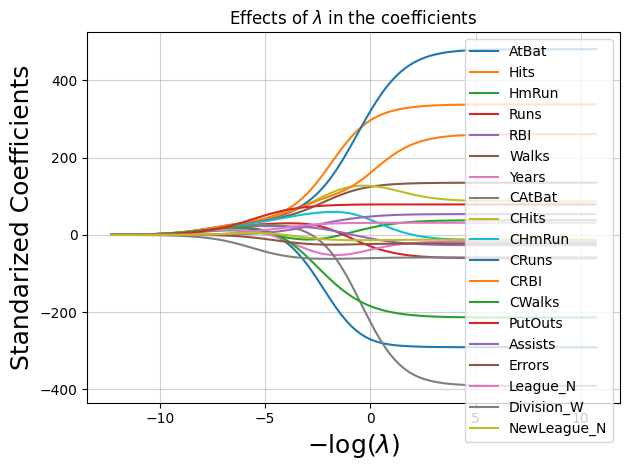

In [24]:
plt.figure(figsize = (10,10))
coefs.plot()
plt.xlabel('$-\log(\lambda)$', fontsize=18)
plt.ylabel('Standarized Coefficients', fontsize = 18)
plt.title('Effects of $\lambda$ in the coefficients')
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.legend()
plt.show()


In this graph we can see how the coefficients are really small when lambda is really big, they tend to almost zero. When values get bigger we get the coefficients of the OLS solution.


In [25]:
beta_hat = coefs.loc[coefs.index[39]]
lambdas[39], beta_hat


(25.486796370462635,
 AtBat         -60.554231
 Hits           94.445543
 HmRun         -11.652839
 Runs           29.082098
 RBI            20.558595
 Walks          61.290878
 Years         -32.326762
 CAtBat         11.255280
 CHits          72.074056
 CHmRun         52.153738
 CRuns          76.011242
 CRBI           73.044427
 CWalks        -45.183088
 PutOuts        70.812650
 Assists        18.834114
 Errors        -22.285540
 League_N       23.712255
 Division_W    -59.725489
 NewLeague_N    -5.619252
 Name: -3.2381605286715383, dtype: float64)

In [26]:
print(f'The Sum Of Squares of the coefficients when lambda equals: {lambdas[39]:.3f} is {np.linalg.norm(beta_hat):.3f}')

The Sum Of Squares of the coefficients when lambda equals: 25.487 is 223.641


In [27]:
beta_hat = coefs.loc[coefs.index[59]]
lambdas[59], beta_hat

(0.2432838214067956,
 AtBat         -286.936388
 Hits           325.613238
 HmRun           30.749554
 Runs           -49.662678
 RBI            -20.471822
 Walks          132.004095
 Years          -24.447248
 CAtBat        -337.196995
 CHits          112.487637
 CHmRun           8.886581
 CRuns          420.564698
 CRBI           218.523975
 CWalks        -204.061030
 PutOuts         78.769332
 Assists         51.904366
 Errors         -22.746199
 League_N        31.264628
 Division_W     -59.036546
 NewLeague_N    -12.961844
 Name: 1.4135265278820888, dtype: float64)

In [28]:
print(f'The Sum Of Squares of the coefficients when lambda equals: {lambdas[59]:.3f} is {np.linalg.norm(beta_hat):.3f}')

The Sum Of Squares of the coefficients when lambda equals: 0.243 is 785.468


# Hypertunning $λ$ for ridge

In [46]:
lambdas = 10 ** np.linspace(8, -2, 100)/ y.std()

ridge = Ridge(fit_intercept=True)
scaler = StandardScaler()
pipe = Pipeline(steps=[
    ('scaling', scaler),
    ('ridge', ridge)
])

param_grid = {'ridge__alpha': lambdas}
cv = KFold(n_splits=5, shuffle = True, random_state = 2025)

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    verbose = 0,
    n_jobs=-1
)

grid.fit(X, y)




GridSearchCV(cv=KFold(n_splits=5, random_state=2025, shuffle=True),
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([2.21671157e+05, 1.75670601e+05, 1.39215947e+05, 1.10326257e+05,
       8.74316722e+04, 6.92881050e+04, 5.49096382e+04, 4.35149493e+04,
       3.44848531e+04, 2.73286563e+04, 2.16574928e+04, 1...
       4.66596538e-03, 3.69769776e-03, 2.93036224e-03, 2.32226196e-03,
       1.84035289e-03, 1.45844819e-03, 1.15579525e-03, 9.15947970e-04,
       7.25873102e-04, 5.75242020e-04, 4.55869463e-04, 3.61268754e-04,
       2.86299309e-04, 2.26887306e-04, 1.79804310e-04, 1.42491841e-04,
       1.12922347e-04, 8.94890287e-05, 7.09185249e-05, 5.62017181e-05,
       4.45389005e-05, 3.52963169e-05, 2.79717276e-05, 2.21671157e-05])},
             scoring='neg_mean_squared_error')

In [47]:
best_alpha = grid.best_params_['ridge__alpha']
best_model = grid.best_estimator_
best_scores = grid.best_score_
print(f'Best alpha: {best_alpha}')
print(f'Best model: {best_model}')
print(f'Score Obtained: {best_scores}')

Best alpha: 206.73126314140944
Best model: Pipeline(steps=[('scaling', StandardScaler()),
                ('ridge', Ridge(alpha=206.73126314140944))])
Score Obtained: -127916.52205724742


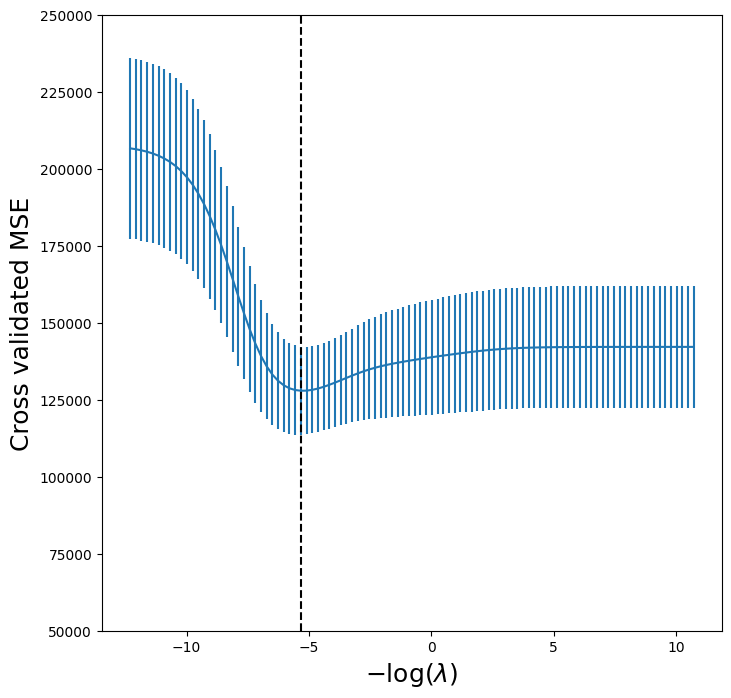

In [48]:
K = 5
tuned_ridge = pipe.named_steps['ridge']
ridgecv_fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr = grid.cv_results_['std_test_score'] / np.sqrt(K))


ax.axvline(-np.log(grid.best_params_['ridge__alpha']), c='k', ls='--')
ax.set_ylim([50000, 250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=18)
ax.set_ylabel('Cross validated MSE', fontsize=18)
plt.show()

# L1 Regularization -- Lasso

In [49]:
lambdas = 10 ** np.linspace(8, -2, 100)/ y.std()
coefs = []
lambda_alpha = []
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for alphas in lambdas:
    lasso = Lasso(alpha = alphas)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)
    lambda_alpha.append(alphas)

coefs = pd.DataFrame(coefs, columns = X.columns)
coefs['log_lambdas'] = -np.log(lambda_alpha)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e+04, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.426e+04, tolerance: 5.332e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+04, tolerance: 5.332e

In [50]:
coefs = coefs.set_index(coefs['log_lambdas'])
coefs.drop('log_lambdas', axis = 1, inplace = True)
coefs

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
log_lambdas,,,,,,,,,,,,,,,,,,,
-12.308950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
-12.076366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
-11.843782,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
-11.611197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
-11.378613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.786563,-286.765494,331.477325,36.586258,-57.665370,-26.059322,133.909310,-14.048401,-426.001587,135.967181,-5.014522,465.240454,247.020865,-208.878102,78.625541,54.493836,-22.512828,31.674683,-58.373187,-12.763025
10.019148,-286.765330,331.477458,36.586696,-57.665730,-26.059791,133.909453,-14.048091,-426.006030,135.969885,-5.015028,465.241362,247.021966,-208.878190,78.625524,54.494005,-22.512881,31.674790,-58.373196,-12.763132
10.251732,-286.765201,331.477563,36.587042,-57.666015,-26.060163,133.909566,-14.047846,-426.009551,135.972028,-5.015429,465.242081,247.022838,-208.878259,78.625511,54.494138,-22.512924,31.674875,-58.373203,-12.763216


<Figure size 1000x1000 with 0 Axes>

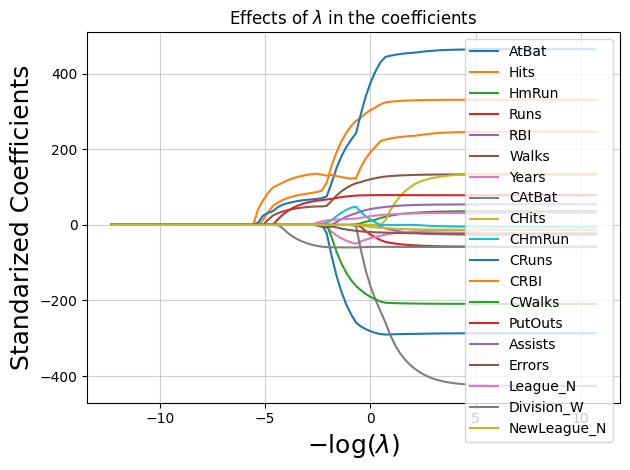

In [51]:
plt.figure(figsize = (10,10))
coefs.plot()
plt.xlabel('$-\log(\lambda)$', fontsize=18)
plt.ylabel('Standarized Coefficients', fontsize = 18)
plt.title('Effects of $\lambda$ in the coefficients')
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.legend()
plt.show()


In [52]:
lambdas = 10 ** np.linspace(8, -2, 100)/ y.std()

lasso = Lasso(fit_intercept=True)
scaler = StandardScaler()
pipeline_lasso = Pipeline(steps = [
    ('scaler', scaler),
    ('lasso', lasso),
])
param_grid = {'lasso__alpha': lambdas}
cv = KFold(n_splits = 5, shuffle=True, random_state = 2025)
grid = GridSearchCV(pipeline_lasso,
                    param_grid,
                    scoring = 'neg_mean_squared_error',
                    n_jobs = -1,
                    cv = cv)
model = grid.fit(X, y)






In [53]:
best_alpha = model.best_params_['lasso__alpha']
best_model = model.best_estimator_
best_scores = model.best_score_
print(f'Best alpha: {best_alpha}')
print(f'Best model: {best_model}')
print(f'Score Obtained: {best_scores}')

Best alpha: 2.490085383359973
Best model: Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=2.490085383359973))])
Score Obtained: -136708.1751193335


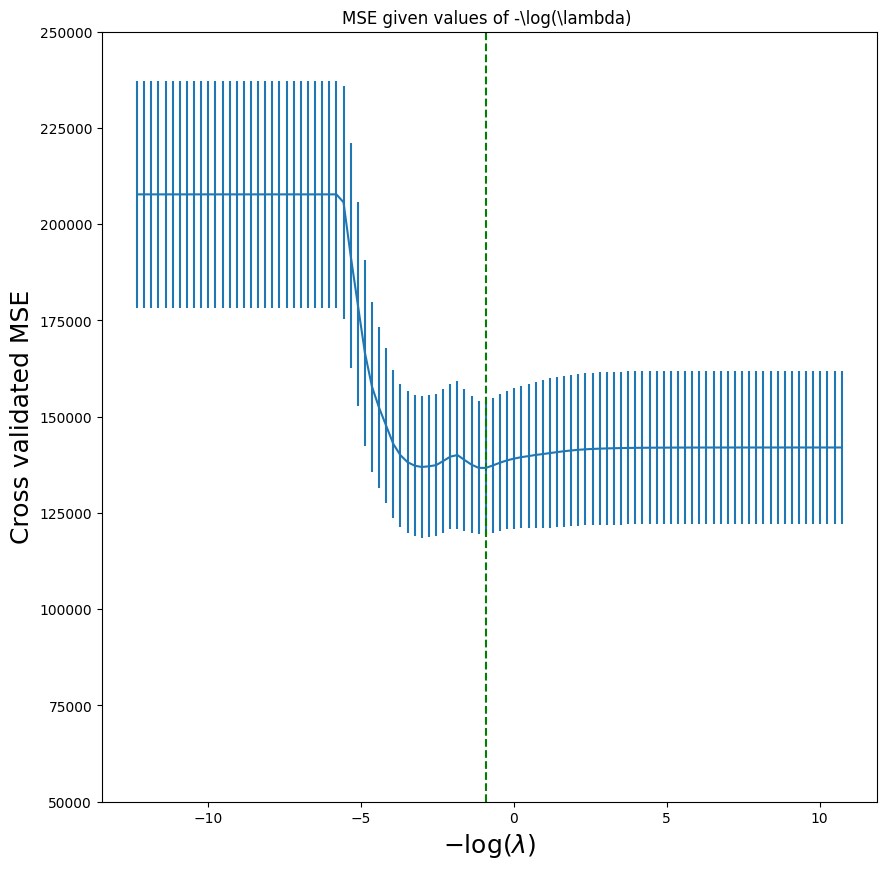

In [56]:
K = 5
tuned_lasso = pipeline_lasso.named_steps['lasso']
ax_lasso, ax = plt.subplots(figsize = (10,10))
ax.errorbar(-np.log(lambdas),
                  -grid.cv_results_['mean_test_score'],
                  yerr = grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.axvline(-np.log(grid.best_params_['lasso__alpha']), color = 'green', linestyle = '--')
ax.set_ylim([50000, 250000])
ax.set_title('MSE given values of -\log(\lambda) ')
ax.set_xlabel('$-\log(\lambda)$', fontsize=18)
ax.set_ylabel('Cross validated MSE', fontsize=18)
plt.show()




Regularization techniques allow us to fight overfitting by simplifying the model coefficients. In this lab, we studied two methods:

1. Lasso (L1 penalty): Reduces a subset of coefficients to zero, effectively working as a feature selection or feature cleaning step.

2. Ridge (L2 penalty): Reduces the magnitude of coefficients without setting them exactly to zero, helping to address multicollinearity issues.


In this lab, we observed that Ridge performed better than Lasso. This is likely because we did not evaluate the number of selected features, and Ridge tends to preserve more information by not eliminating features. However, Lasso might be preferred in scenarios where identifying the most relevant variables is a priority.


This exercise allowed us to explore the power of regularization techniques, the importance of using cross-validation to select the optimal value of λ, and the flexibility of sklearn.pipeline for building efficient workflows.


**Key takeaways about regularization:**

1. Scaling the data: It is essential to ensure that all features are on the same scale, allowing the regularization penalty to affect coefficients uniformly.
2. Choosing the appropriate value of λ: Finding the optimal λ through cross-validation is crucial for minimizing the mean squared error (MSE) and obtaining a well-generalized solution.

 Regularization methods are powerful tools to improve the generalization capacity of linear models by controlling model complexity and mitigating issues like overfitting or multicollinearity.